## Creating word vectors with word2vec

    We are creating word vectors

### Load dependencies

In [3]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/serdar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load Data

In [6]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/serdar/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [7]:
from nltk.corpus import gutenberg

In [8]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [9]:
len(gutenberg.fileids())
# we have 18 books

18

### Tokenize text

In [10]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [11]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [12]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [13]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [14]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [15]:
gberg_sents = gutenberg.sents()

In [16]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [18]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [20]:
len(gutenberg.words())

2621613

### Run word2vec

In [22]:
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers= 10)
## sg ==> skip gram, 64 dimentional

In [23]:
model.save('raw_gutenberg_model.w2v')

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Explore model

In [25]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [37]:
model.wv['dog']

array([ 0.3245207 ,  0.17853795, -0.5235811 , -0.34453347, -0.00930518,
        0.07484231,  0.33746907,  0.6261735 ,  0.17023963, -0.08959281,
        0.39222905, -0.06497475, -0.31043223, -0.75254864,  0.3024847 ,
       -0.00097567, -0.2957942 , -0.05192839,  0.32907647,  0.16773853,
        0.22131208, -0.06470571, -0.4162206 ,  0.26845643,  0.1571531 ,
       -0.3172568 , -0.00713319, -0.06305556, -0.09367853,  0.17879155,
       -0.06059417,  0.59296983, -0.0741465 ,  0.37894088,  0.10465955,
        0.72731936, -0.33158267, -0.08225527,  0.17642853,  0.13296856,
       -0.112576  ,  0.3727881 , -0.08260708, -0.08974348,  0.11530533,
        0.01541412, -0.40692955, -0.29424697,  0.53886837, -0.07018038,
       -0.45767784,  0.03079759, -0.04349227, -0.30307856, -0.14023043,
       -0.03129008, -0.06225264,  0.5230677 , -0.25434646, -0.01799251,
       -0.11623161, -0.35354656,  0.2753522 ,  0.1552631 ], dtype=float32)

In [36]:
model.wv.__getitem__('dog')

array([ 0.3245207 ,  0.17853795, -0.5235811 , -0.34453347, -0.00930518,
        0.07484231,  0.33746907,  0.6261735 ,  0.17023963, -0.08959281,
        0.39222905, -0.06497475, -0.31043223, -0.75254864,  0.3024847 ,
       -0.00097567, -0.2957942 , -0.05192839,  0.32907647,  0.16773853,
        0.22131208, -0.06470571, -0.4162206 ,  0.26845643,  0.1571531 ,
       -0.3172568 , -0.00713319, -0.06305556, -0.09367853,  0.17879155,
       -0.06059417,  0.59296983, -0.0741465 ,  0.37894088,  0.10465955,
        0.72731936, -0.33158267, -0.08225527,  0.17642853,  0.13296856,
       -0.112576  ,  0.3727881 , -0.08260708, -0.08974348,  0.11530533,
        0.01541412, -0.40692955, -0.29424697,  0.53886837, -0.07018038,
       -0.45767784,  0.03079759, -0.04349227, -0.30307856, -0.14023043,
       -0.03129008, -0.06225264,  0.5230677 , -0.25434646, -0.01799251,
       -0.11623161, -0.35354656,  0.2753522 ,  0.1552631 ], dtype=float32)

In [35]:
len(model.wv['dog'])

64

In [33]:
model.wv.most_similar('dog')

[('puppy', 0.8303418159484863),
 ('cage', 0.8044264316558838),
 ('broth', 0.7662862539291382),
 ('arrow', 0.7560452818870544),
 ('sweeper', 0.7558138966560364),
 ('chimney', 0.746036171913147),
 ('shell', 0.7384276390075684),
 ('kettle', 0.733992874622345),
 ('bun', 0.725582480430603),
 ('whip', 0.722876787185669)]

In [38]:
model.wv.most_similar('think')

[('suppose', 0.8538557887077332),
 ('contradict', 0.8200130462646484),
 ('_you_', 0.814937174320221),
 ('mean', 0.8096643686294556),
 ('Mamma', 0.8056288957595825),
 ('NOW', 0.8017430305480957),
 ('know', 0.7997968792915344),
 ('manage', 0.7985367774963379),
 ('really', 0.7975704073905945),
 ('Dreyfus', 0.7962379455566406)]

In [39]:
model.wv.most_similar('day')

[('morning', 0.7741515636444092),
 ('night', 0.7384979724884033),
 ('time', 0.7204721570014954),
 ('month', 0.7019217014312744),
 ('seventh', 0.6806275844573975),
 ('Adar', 0.6791442632675171),
 ('fourteenth', 0.6776920557022095),
 ('evening', 0.6716722249984741),
 ('week', 0.6607051491737366),
 ('Early', 0.6556621789932251)]

In [40]:
model.wv.most_similar('father')

[('brother', 0.8663461208343506),
 ('mother', 0.8559780120849609),
 ('sister', 0.8145593404769897),
 ('wife', 0.7935311198234558),
 ('daughter', 0.7730830311775208),
 ('uncle', 0.7574194073677063),
 ('Amnon', 0.7546224594116211),
 ('servant', 0.7243363857269287),
 ('master', 0.7160907983779907),
 ('Nabal', 0.7137832641601562)]

In [41]:
model.wv.doesnt_match("mother father daughter cat".split())

/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cat'

In [42]:
model.wv.similarity('father', 'cat')

0.35645503

In [43]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])
# math here is: father - man + woman ==> expected 'mother'

[('sister', 0.8129746913909912),
 ('wife', 0.7947289943695068),
 ('husband', 0.769311785697937),
 ('daughter', 0.7605528831481934),
 ('mother', 0.7576314210891724),
 ('brother', 0.7407863140106201),
 ('Sarai', 0.7293796539306641),
 ('Amnon', 0.7027525901794434),
 ('Sarah', 0.7014440894126892),
 ('daughters', 0.7005109786987305)]

In [46]:
model.wv.most_similar(positive=['son', 'woman'], negative=['man'])

[('Sarai', 0.7311557531356812),
 ('wife', 0.7290012836456299),
 ('Leah', 0.7280599474906921),
 ('Sarah', 0.7213491201400757),
 ('Esau', 0.7209383249282837),
 ('Bilhah', 0.7080114483833313),
 ('Rebekah', 0.7044703960418701),
 ('Abram', 0.7003413438796997),
 ('conceived', 0.6994847059249878),
 ('Hittite', 0.6986265778541565)]

In [48]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man'], topn=30)

[('wife', 0.7348835468292236),
 ('sister', 0.7151252031326294),
 ('child', 0.6984539031982422),
 ('conceived', 0.681908369064331),
 ('daughter', 0.6636079549789429),
 ('mother', 0.6565762758255005),
 ('widow', 0.6429649591445923),
 ('maid', 0.6378687024116516),
 ('adultery', 0.6307915449142456),
 ('harlot', 0.6259700059890747),
 ('elder', 0.6241905689239502),
 ('bare', 0.6222308874130249),
 ('whoredoms', 0.6177182197570801),
 ('Sarai', 0.6166349053382874),
 ('married', 0.6127481460571289),
 ('daughters', 0.6108424663543701),
 ('nurse', 0.5993542671203613),
 ('loved', 0.5950107574462891),
 ('committeth', 0.5934972763061523),
 ('handmaid', 0.592648983001709),
 ('betrothed', 0.5913580060005188),
 ('Amnon', 0.5899099111557007),
 ('Abram', 0.583054780960083),
 ('herself', 0.5816390514373779),
 ('Rachel', 0.5795958042144775),
 ('whoredom', 0.5786200761795044),
 ('Leah', 0.5785064697265625),
 ('Tamar', 0.5744365453720093),
 ('Sarah', 0.5697439908981323),
 ('nakedness', 0.568672776222229)]

In [49]:
model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=30)

[('Abram', 0.7099012732505798),
 ('Sarah', 0.7063249349594116),
 ('Leah', 0.6914546489715576),
 ('Laban', 0.681435227394104),
 ('David', 0.6781967878341675),
 ('Hagar', 0.6777474880218506),
 ('queen', 0.6735937595367432),
 ('Rachel', 0.6694887280464172),
 ('Sarai', 0.6657813787460327),
 ('Bethuel', 0.6649328470230103),
 ('Rebekah', 0.6626061201095581),
 ('Samaria', 0.6621767282485962),
 ('Solomon', 0.6599255204200745),
 ('Padanaram', 0.6593511700630188),
 ('Lot', 0.6565443277359009),
 ('Esau', 0.6536878347396851),
 ('Joseph', 0.6530309319496155),
 ('Vashti', 0.6528620719909668),
 ('damsel', 0.6494235992431641),
 ('Abimelech', 0.6483592391014099),
 ('daughter', 0.6476473808288574),
 ('Naboth', 0.6462832093238831),
 ('Cain', 0.643326461315155),
 ('Bilhah', 0.6420847177505493),
 ('Hadad', 0.6414060592651367),
 ('household', 0.6410378813743591),
 ('Rahab', 0.637712836265564),
 ('Hittite', 0.6359084248542786),
 ('Shechem', 0.6356524229049683),
 ('Uriah', 0.6349976062774658)]

### Reduce word vector dimensionality with t-SNE

In [50]:
len(model.wv.vocab)

17011

In [56]:
x = model[model.wv.vocab]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [62]:
tsne = TSNE(n_components=2, n_iter=1000)
# creates x and y coordinates

In [63]:
X_2d = tsne.fit_transform(x)

In [65]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [85]:
coords_df.head()

,x,y,token
0,-38.677380,-4.929636,you
1,19.963829,-41.253666,have
2,19.898040,-41.319280,had
3,12.018706,-56.065758,her
4,-35.415670,-7.894360,here


In [86]:
coords_df['value'] = model.wv.vocab.values()

In [87]:
coords_df.head()

,x,y,token,value
0,-38.677380,-4.929636,you,"Vocab(count:14650, index:24, sample_int:254943..."
1,19.963829,-41.253666,have,"Vocab(count:9902, index:33, sample_int:3298917..."
2,19.898040,-41.319280,had,"Vocab(count:10177, index:32, sample_int:323910..."
3,12.018706,-56.065758,her,"Vocab(count:11155, index:30, sample_int:304748..."
4,-35.415670,-7.894360,here,"Vocab(count:1440, index:227, sample_int:429496..."


In [67]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

### Visulize 2D representation of word vectors

In [68]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [70]:
coords_df .head(20)

,x,y,token
0,-38.677380,-4.929636,you
1,19.963829,-41.253666,have
2,19.898040,-41.319280,had
3,12.018706,-56.065758,her
4,-35.415670,-7.894360,here
5,12.546443,-30.462835,to
6,-45.169174,-18.892426,do
7,32.498947,35.309895,needlework
8,20.077578,-21.951270,","
9,-38.213930,-5.349800,I


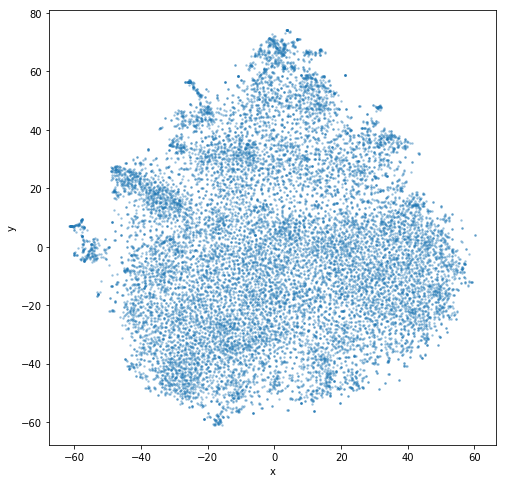

In [76]:
_ = coords_df.plot.scatter('x', 'y', figsize=[8,8], marker='.', s=10, alpha=0.3)

### Bokeh Plot

In [77]:
output_notebook()

Loading BokehJS ...

In [78]:
subset_df = coords_df.sample(n=5000)

In [82]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token) 

In [84]:
show(p)